# Data Exploration

## Imports

In [134]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Actual PATH
import configparser
import warnings
import os
import subprocess

## Prepare Principal Directory

In [135]:
def prepare_directory_work(end_directory: str='notebooks'):
    # Current path
    curr_dir = os.path.dirname (os.path.realpath ("__file__")) 
    
    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return curr_dir
    
    return f'Current working directory: {curr_dir}'

In [136]:
prepare_directory_work(end_directory='notebooks')

'Current working directory: /home/campos/projetos/artificial_inteligence/projects/analise_despesas_senadores'

## Cell Format

In [180]:
config = configparser.ConfigParser()
config.read('src/visualization/matplotlib_config.ini')

figure_titlesize = config['figure']['figure_titlesize']
figure_figsize_large = int(config['figure']['figure_figsize_large'])
figure_figsize_width = int(config['figure']['figure_figsize_width'])
figure_dpi = int(config['figure']['figure_dpi'])
figure_facecolor = config['figure']['figure_facecolor']
figure_autolayout = bool(config['figure']['figure_autolayout'])
savefig_format = config['figure']['savefig_format']
savefig_dpi = int(config['figure']['savefig_dpi'])

font_family = config['font']['font_family']
font_size = int(config['font']['font_size'])

In [201]:
# MatplotLib rcParams
# ===================

plt.style.use('seaborn')  # fivethirtyeight

# Figure
plt.rcParams['figure.titlesize'] = figure_titlesize
plt.rcParams['figure.figsize'] = [figure_figsize_large, figure_figsize_width] 
plt.rcParams['figure.dpi'] = figure_dpi
plt.rcParams['figure.facecolor'] = figure_facecolor
plt.rcParams['figure.autolayout'] = figure_autolayout

plt.rcParams['savefig.format'] = savefig_format
plt.rcParams['savefig.dpi'] = savefig_dpi

# Font
plt.rcParams['font.family'] = font_family
plt.rcParams['font.size'] = font_size

In [188]:
# Seaborn rcParams
# ===================

rc={'savefig.dpi': 500, 
    'figure.autolayout': True, 
    'figure.figsize': [17, 10], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 1.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 15,
    'xtick.labelsize': 15, 
    'ytick.labelsize': 15}

sns.set(font=font_family,
        context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True, 
        rc=rc)

In [153]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# Format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.10}'.format)

# Print xxxx rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load dataset

In [165]:
df = pd.read_csv('data/cleansing/dados_limpos_ceaps_cleansing.csv',
                 encoding='utf-8',
                 delimiter=',',
                 verbose=True)

Tokenization took: 16.82 ms
Type conversion took: 31.34 ms
Parser memory cleanup took: 0.00 ms


In [166]:
dict_map_senadores = dict(pd.read_csv('data/cleansing/map_senadores.csv',
                               encoding='utf-8',
                               delimiter=',',
                               verbose=True))

Tokenization took: 0.01 ms
Type conversion took: 0.16 ms
Parser memory cleanup took: 0.00 ms


In [167]:
type(dict_map_senadores)

dict

In [168]:
# Primeiras linhas do dataset
df.head()

,DIA,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO
0,1,1,1,Aluguel,2482,2685,001/16,"Despesa com pagamento de aluguel, utilizado pa...",6000.0
1,1,1,1,Despesas gerais,3375,16,00608918,Aquisição de publicação virtual de conteúdo jo...,550.0
2,1,1,1,Passagens,2483,2686,MISSING,"Companhia Aérea: TAM, Localizador: 8JUTEK. Pas...",552.74
3,13,1,1,Aluguel,3519,16,000011328,Despesa com pagamento de energia elétrica para...,73.6
4,13,1,1,Contratações,2468,5,312,MISSING,40.0


### Seleção condicional onde pegamos todos as linhas cujo o valor reembolsado é R$ 0,01

In [158]:
df[df['VALOR_REEMBOLSADO'] == 0.01]

,DIA,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO
6844,22,3,29,Passagens,3852,4310,NFPJ4Z,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6853,30,3,29,Passagens,3852,4310,OEI85P,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11250,6,6,42,Passagens,3852,4310,3EY28M,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11489,17,12,42,Passagens,3852,1883,NCNMYL,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
18730,21,6,64,Passagens,2998,3254,FT00020270,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23299,31,3,83,Passagens,3473,3833,BGNV5G,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01


---

## Bar Plot

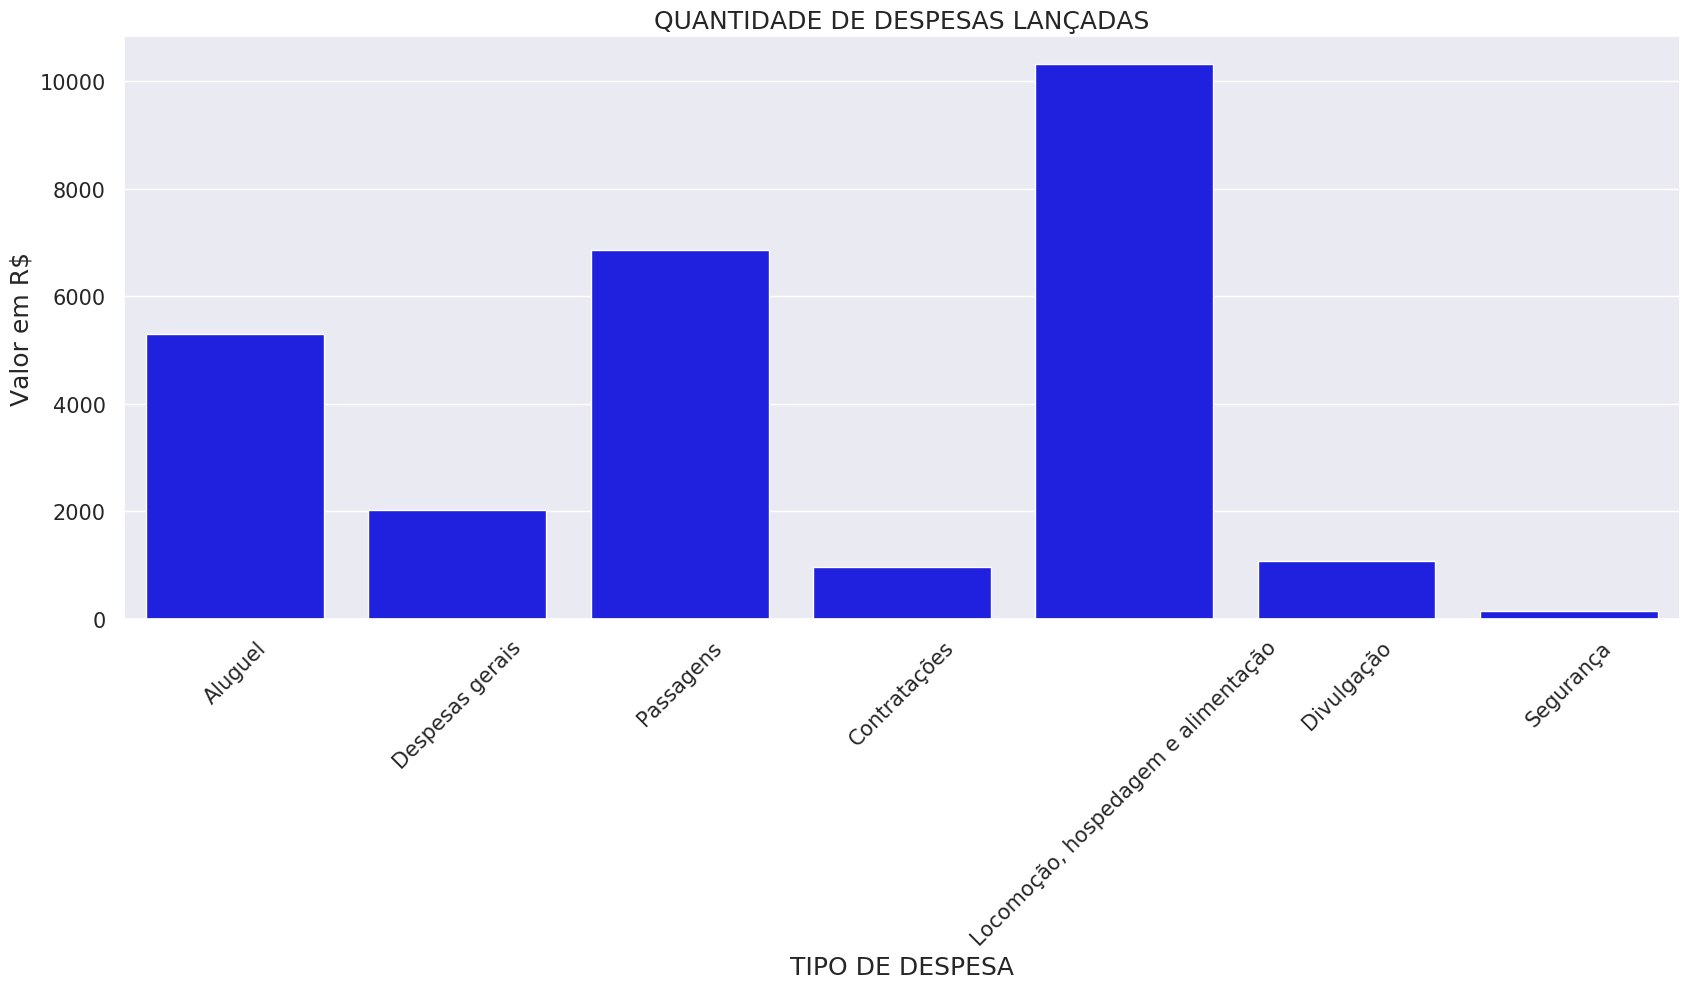

In [192]:
plot_tipo_despesa = sns.countplot(data=df, 
                                  x='TIPO_DESPESA',
                                  color='blue')

plt.title('QUANTIDADE DE DESPESAS LANÇADAS')
plt.xlabel('TIPO DE DESPESA')
plt.ylabel('Valor em R$')
plt.xticks(rotation=45)

#Exibindo gráfico
plt.show()

### Check Values by `SENADOR`

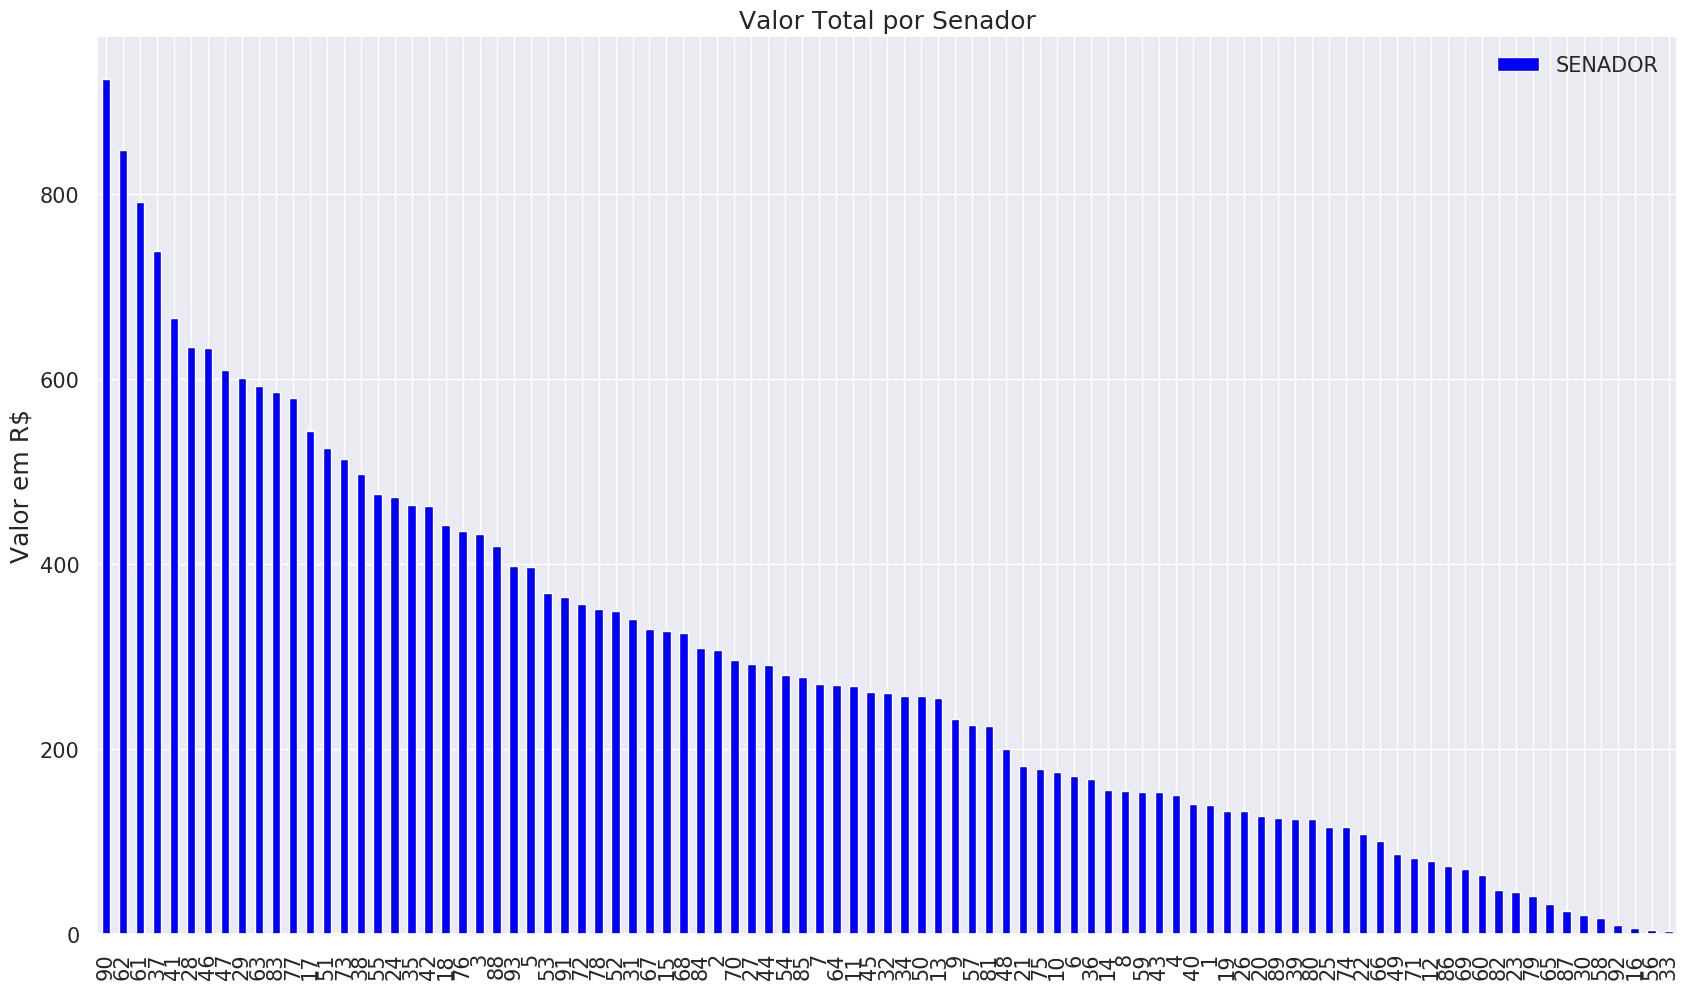

In [191]:
df['SENADOR'].value_counts().plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.title("Valor Total por Senador")
plt.ylabel('Valor em R$')
plt.legend()

plt.show()

### Top Values Received

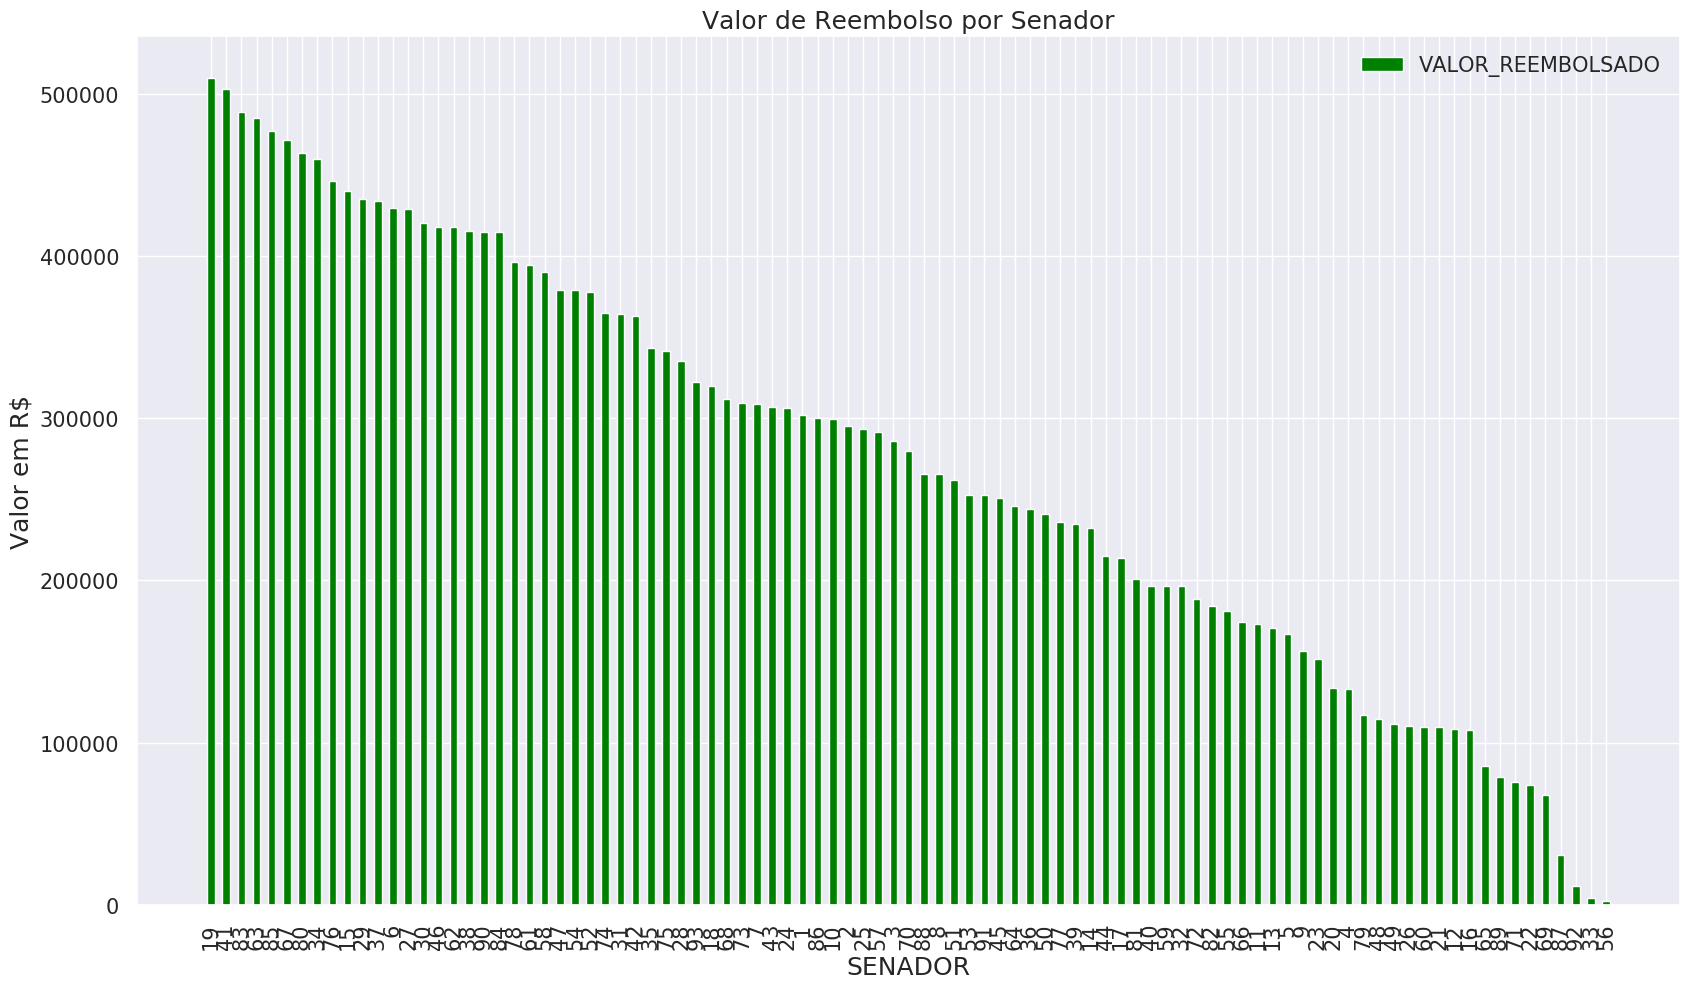

In [190]:
valores_senadores = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)
valores_senadores.plot(kind='bar', color='green')
plt.xticks(rotation=90)
plt.title("Valor de Reembolso por Senador")
plt.ylabel('Valor em R$')
plt.legend()
plt.autoscale()

plt.show()

### Verificando o quanto que foi pedido de reembolso durante cada mês

In [45]:
gastos_por_mes = df.pivot_table(index='MES', values='VALOR_REEMBOLSADO', aggfunc=np.sum)
display(gastos_por_mes)

,VALOR_REEMBOLSADO
MES,
1,1463093.56
2,1976629.82
3,2274284.68
4,2100730.33
5,2143250.74
6,2209418.6
7,2095507.76
8,2225091.09
9,2086564.62


In [54]:
gastos_por_mes = df.pivot_table(index='MES', values='VALOR_REEMBOLSADO', aggfunc=np.sum)

gastos_por_mes = gastos_por_mes.rename(index={1:"janeiro",
                                              2:"fevereiro",
                                              3:"março",
                                              4:"abril",
                                              5:"maio",
                                              6:"junho",
                                              7:"julho",
                                              8:"agosto",
                                              9:"setembro",
                                              10:"outubro",
                                              11:"novembro",
                                              12:"dezembro"})

In [55]:
display(gastos_por_mes)

,VALOR_REEMBOLSADO
MES,
janeiro,1463093.56
fevereiro,1976629.82
março,2274284.68
abril,2100730.33
maio,2143250.74
junho,2209418.6
julho,2095507.76
agosto,2225091.09
setembro,2086564.62


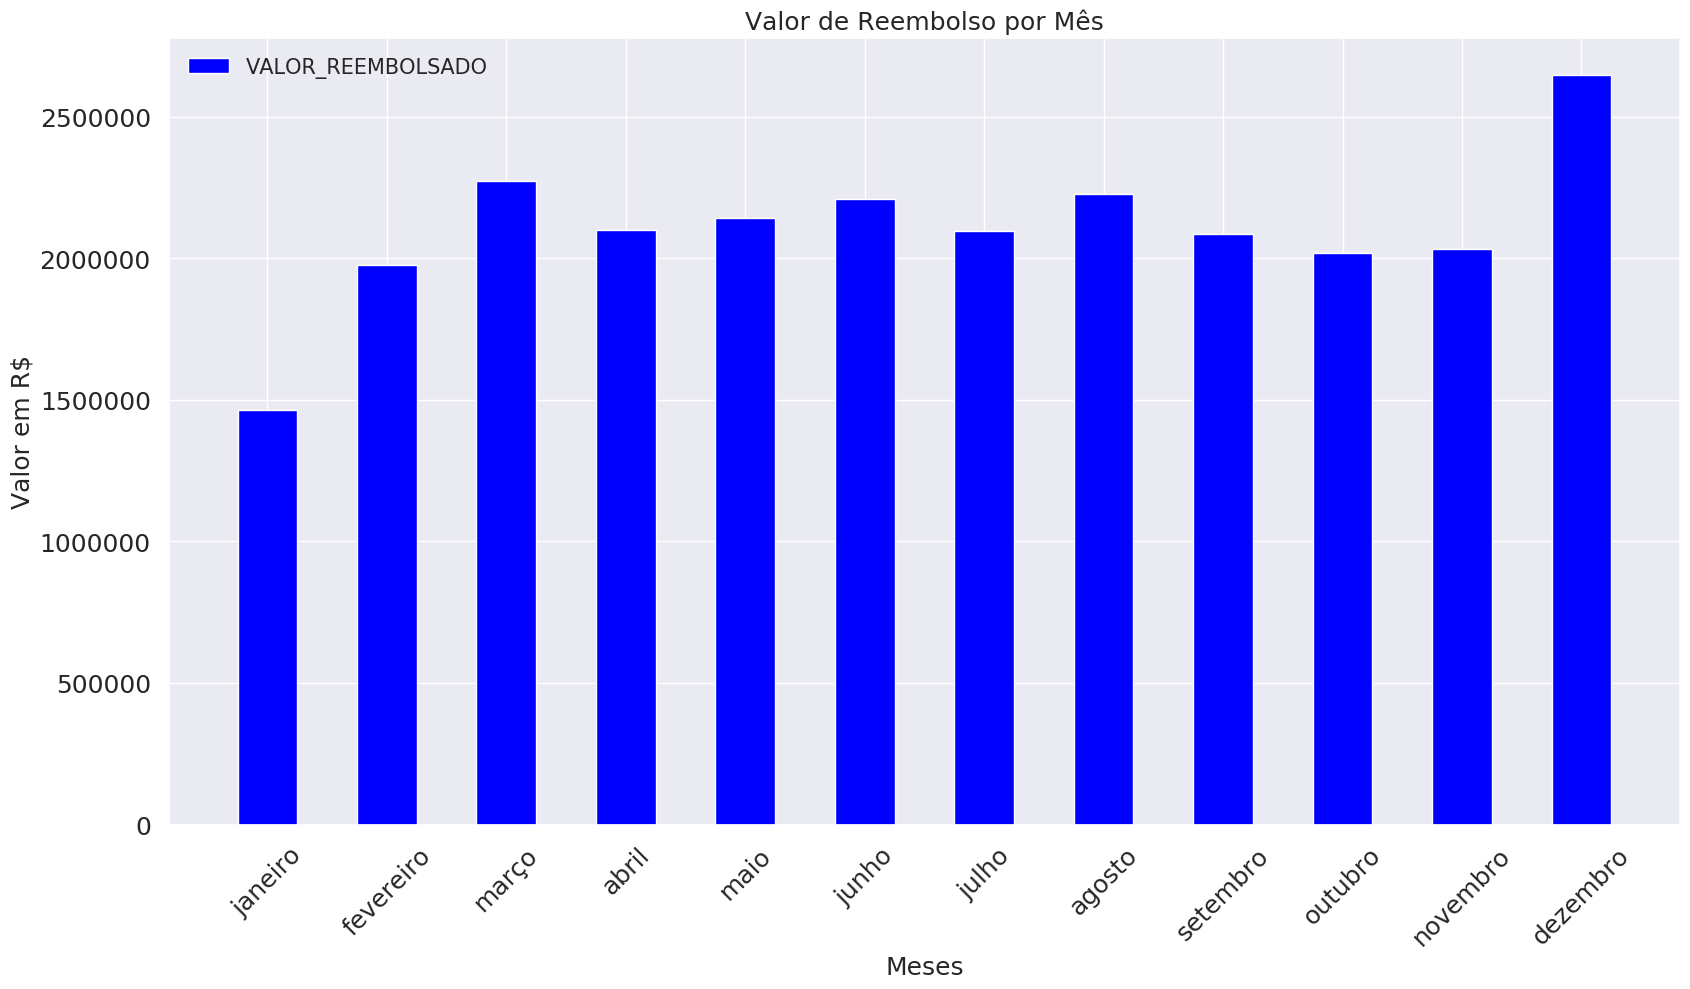

In [189]:
gastos_por_mes.plot(kind='bar', color='blue', fontsize=18)

# visualização do gráfico
plt.ylabel('Valor em R$')
plt.xlabel('Meses')
plt.title("Valor de Reembolso por Mês")
plt.legend(loc="upper right")
plt.legend()
plt.xticks(rotation=45)
plt.autoscale()

plt.show()

### Verificando a média e mediana dos valores reembolsados

In [57]:
#Geração dos dados para o mapa de calor
#Criando uma Pivot Table
mapa_de_calor = df.pivot_table(index='MES', values='VALOR_REEMBOLSADO', columns='TIPO_DESPESA', aggfunc=np.sum)

mapa_de_calor = mapa_de_calor.rename(index={1:"janeiro",
                                              2:"fevereiro",
                                              3:"março",
                                              4:"abril",
                                              5:"maio",
                                              6:"junho",
                                              7:"julho",
                                              8:"agosto",
                                              9:"setembro",
                                              10:"outubro",
                                              11:"novembro",
                                              12:"dezembro"})

mapa_de_calor.head()

TIPO_DESPESA,Aluguel,Contratações,Despesas gerais,Divulgação,"Locomoção, hospedagem e alimentação",Passagens,Segurança
MES,,,,,,,
janeiro,387716.41,213084.63,72464.58,173923.17,373081.3,190543.44,52280.03
fevereiro,423858.67,260918.32,95622.67,222693.49,470883.65,451277.9,51375.12
março,441217.01,297243.39,86689.23,237323.72,526333.34,635800.52,49677.47
abril,430179.71,249704.43,89751.24,262815.02,471441.48,556828.37,40010.08
maio,425371.04,305240.14,84847.06,268376.78,467726.59,546786.53,44902.6


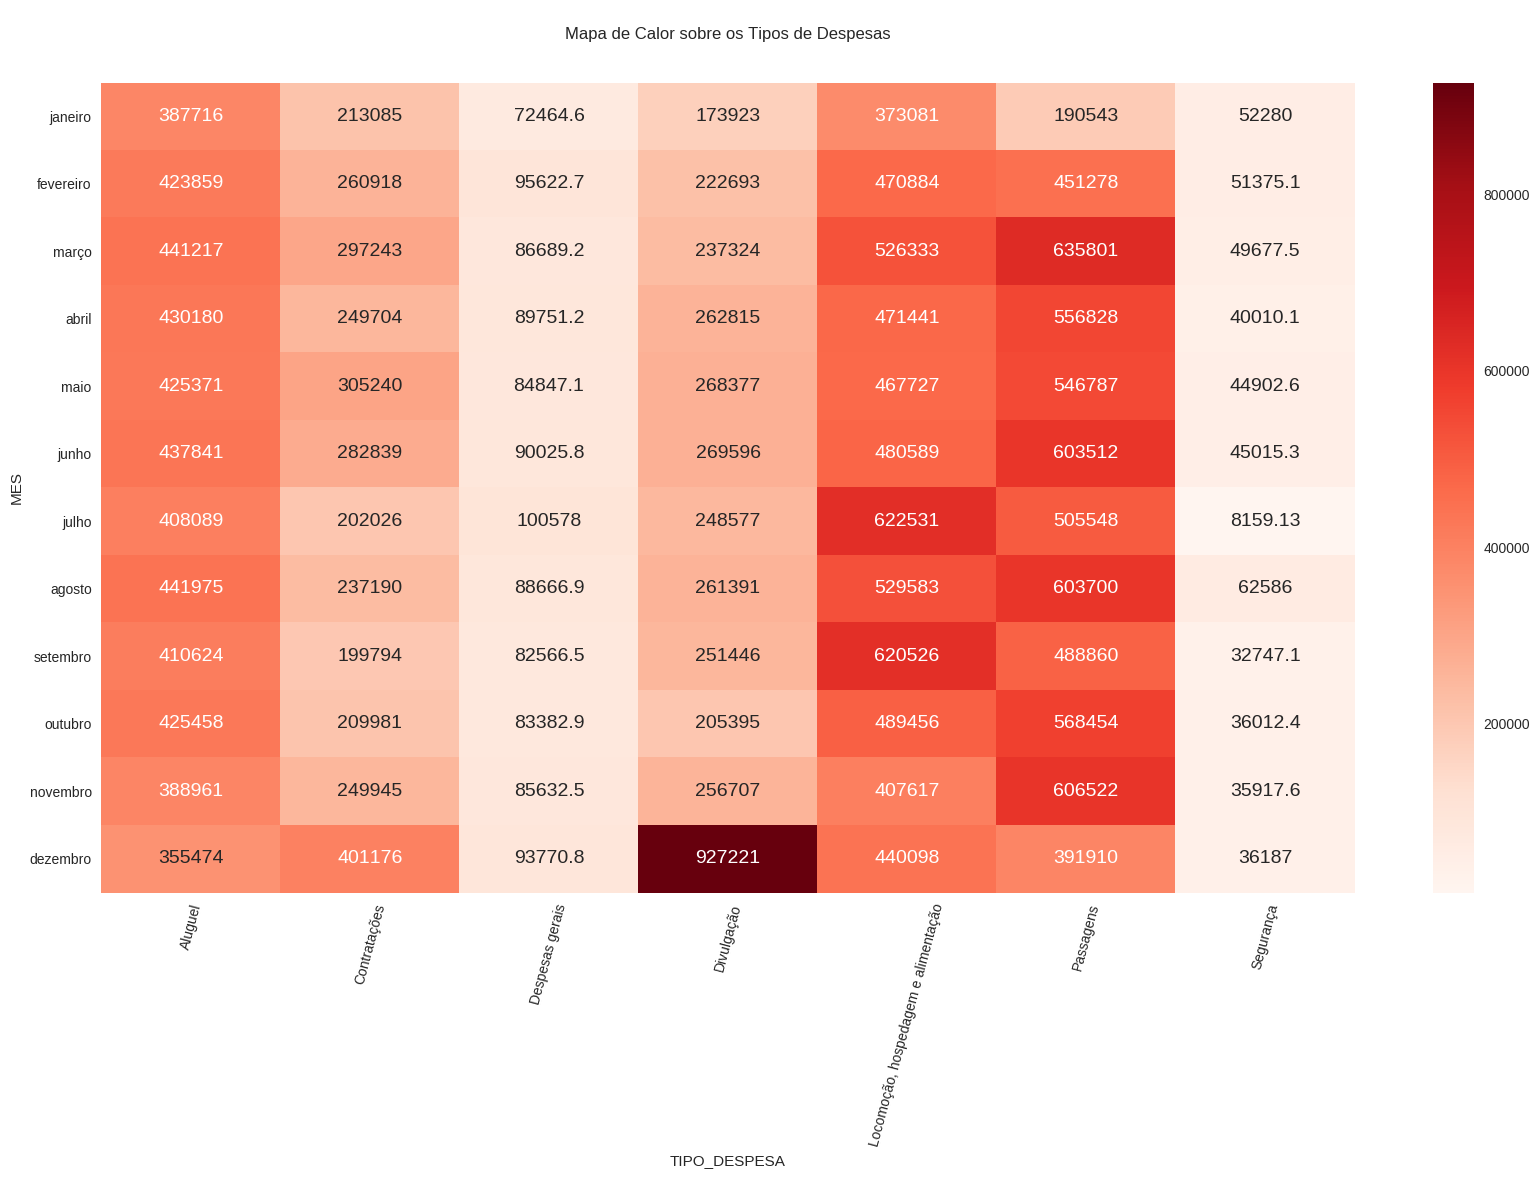

In [198]:
#Gerando o mapa de calor
sns.heatmap(mapa_de_calor, annot=True, fmt='g', cmap='Reds')

plt.title("\nMapa de Calor sobre os Tipos de Despesas\n\n")
plt.xticks(rotation=75)
plt.yticks(rotation=0)

plt.autoscale()

plt.show()